In [3]:
#cd ~/Downloads/aptos2019-blindness-detection/

C:\Users\kaba\Downloads\aptos2019-blindness-detection


In [4]:
# パッケージのimport
from sklearn.model_selection import train_test_split
import pandas as pd
import glob
import os.path as osp
import random
import numpy as np
import json
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import models, transforms

In [5]:
# 乱数のシードを設定
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [6]:
# 入力画像の前処理をするクラス(切り取るだけ)

class ImageTransform():

    def __init__(self, resize=256):
        self.data_transform = transforms.Compose([
                transforms.Resize(resize),  # リサイズ
                transforms.CenterCrop(resize),  # 画像中央をresize×resizeで切り取り
                transforms.ToTensor(),  # テンソルに変換
            ])

    def __call__(self, img):
        return self.data_transform(img)

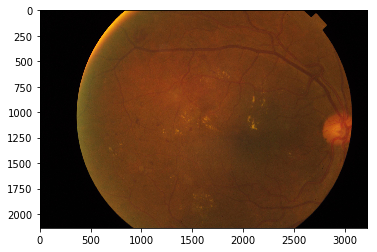

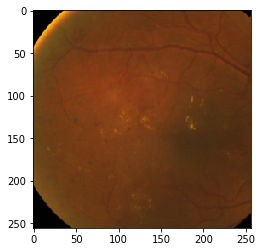

In [8]:
# 訓練時の画像前処理の動作を確認

# 画像読み込み
image_file_path = "./train_images/000c1434d8d7.png"
img = Image.open(image_file_path)   # [高さ][幅][色RGB]

# 元の画像の表示
plt.imshow(img)
plt.show()

transform = ImageTransform()
img_transformed = transform(img)  # torch.Size([3, 224, 224])

# (色、高さ、幅)を (高さ、幅、色)に変換し、0-1に値を制限して表示
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()